In [1]:
import keras
import numpy as np
import pandas as pd
from PIL import Image as img

Using TensorFlow backend.


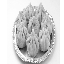

In [4]:
img.open("modak (1).jpg").resize((64, 64)).convert("L")

In [0]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
modak_train_list = glob.glob("modak*.jpg")

In [6]:
len(modak_train_list)

343

In [10]:
x_train = []
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#..............Data Augmentation.......................................................

for i in tqdm(modak_train_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    


y_train = np.tile(1, len(modak_train_list)*4)
print("images loading is done")

100%|██████████| 343/343 [00:01<00:00, 238.47it/s]

images loading is done


In [0]:
other_train_list = glob.glob("obj*.jpg")

In [14]:
keras.backend.image_data_format()
keras.backend.set_image_data_format("channels_first")
keras.backend.image_data_format()

'channels_first'

In [15]:
#..............Data Augmentation.......................................................
for i in tqdm(other_train_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    
y_train = np.concatenate((y_train, np.tile(0, len(other_train_list)*4))).astype("uint8")
print(" images loading is done")

100%|██████████| 354/354 [00:01<00:00, 300.27it/s]

 images loading is done


In [16]:
len(x_train)

2788

In [17]:
len(y_train)

2788

In [0]:
a = np.asarray(x_train)
x_train = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])
del(a)

In [19]:
LeakyReLU = keras.layers.LeakyReLU(alpha=0.01)

In [20]:
#................................. Model training ........................................................

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(1, 64, 64)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=64, activation="relu", kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=12, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [21]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.binary_crossentropy, metrics=["binary_accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_train, y_train, 
test_size=0.25, random_state=5)

In [23]:
model.fit(x=X_train1, y=Y_train1, epochs=5, validation_split=0.1, shuffle=True)



Train on 1881 samples, validate on 210 samples
Epoch 1/5
1881/1881 [==============================] - 52s 28ms/step - loss: 0.6803 - binary_accuracy: 0.5593 - val_loss: 0.6636 - val_binary_accuracy: 0.6190
Epoch 2/5
1881/1881 [==============================] - 51s 27ms/step - loss: 0.6261 - binary_accuracy: 0.6411 - val_loss: 0.6492 - val_binary_accuracy: 0.6381
Epoch 3/5
1881/1881 [==============================] - 51s 27ms/step - loss: 0.5955 - binary_accuracy: 0.6730 - val_loss: 0.6244 - val_binary_accuracy: 0.6714
Epoch 4/5
1881/1881 [==============================] - 51s 27ms/step - loss: 0.5758 - binary_accuracy: 0.6890 - val_loss: 0.6158 - val_binary_accuracy: 0.7143
Epoch 5/5
1881/1881 [==============================] - 51s 27ms/step - loss: 0.5482 - binary_accuracy: 0.7092 - val_loss: 0.5713 - val_binary_accuracy: 0.6952


In [0]:
result = model.predict(x=X_test1)

In [0]:
result = result.reshape(result.shape[0])
result[result>0.5] = 1
result[result<0.5] = 0

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test1, result)

0.6700143472022956

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 63, 63)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 61, 61)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 61, 61)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 59, 59)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 19, 19)       